In [284]:
import pandas as pd
df = pd.read_csv("housing.csv")

In [285]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [286]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [287]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['mainroad_encoded'] = le.fit_transform(df['mainroad'])
df['guestroom_encoded'] = le.fit_transform(df['guestroom'])
df['basement_encoded'] = le.fit_transform(df['basement'])
df['hotwaterheating_encoded'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning_encoded'] = le.fit_transform(df['airconditioning'])
df['prefarea_encoded'] = le.fit_transform(df['prefarea'])

df = df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])

df = pd.get_dummies(df, columns=['furnishingstatus'])
df



,price,area,bedrooms,bathrooms,stories,parking,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,True,False,False
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,True,False,False
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,False,True,False
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,True,False,False
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_encoded            0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_encoded                   0.329777
mainroad_encoded                   0.296898
guestroom_encoded                  0.255517
furnishingstatus_furnished         0.229350
basement_encoded                   0.187057
hotwaterheating_encoded            0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


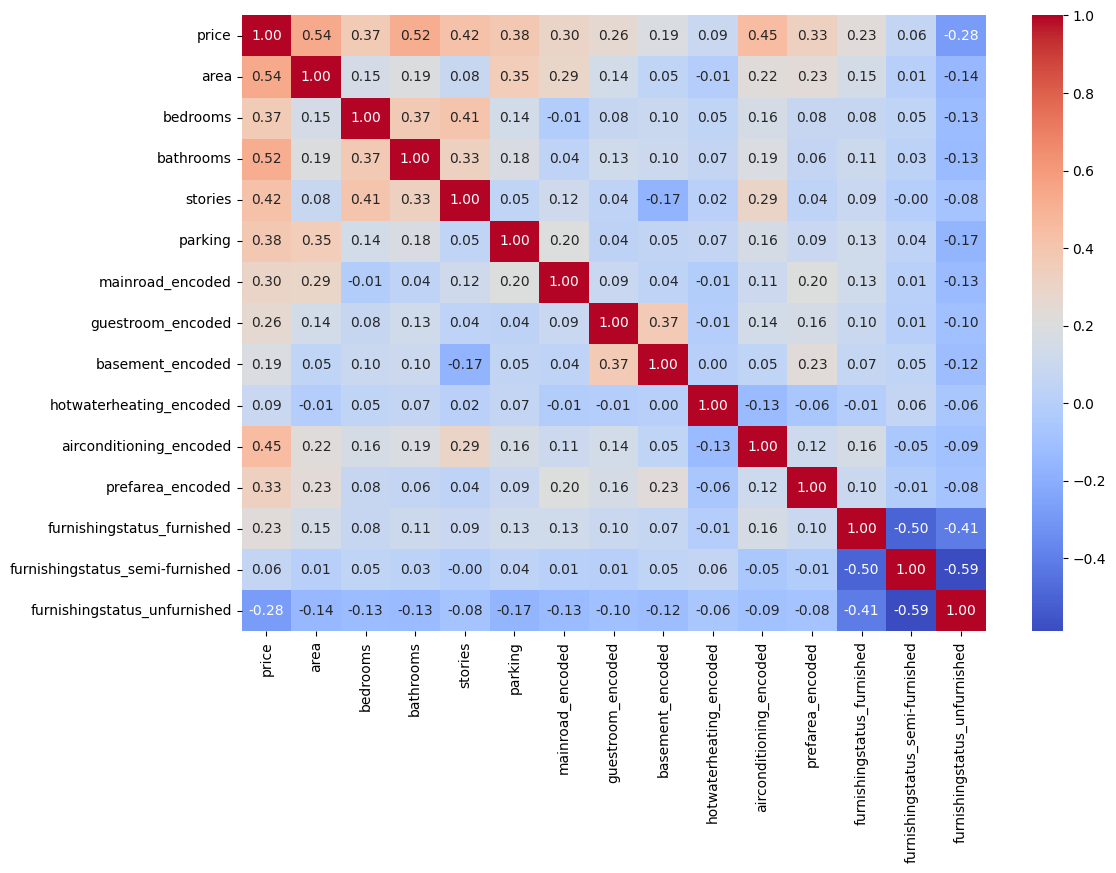

In [289]:


corr_matrix = df.corr()
print(corr_matrix["price"].sort_values(ascending=False))

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


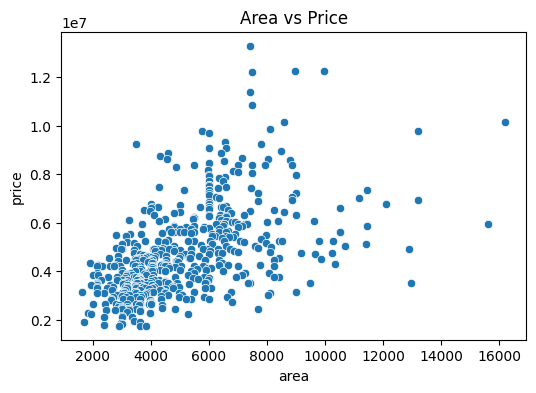

In [290]:
top_features = ['area','bathrooms','airconditioning_encoded','stories','parking','bedrooms','prefarea_encoded']     
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=df['area'], y="price")
plt.title(f"Area vs Price")
plt.show()          

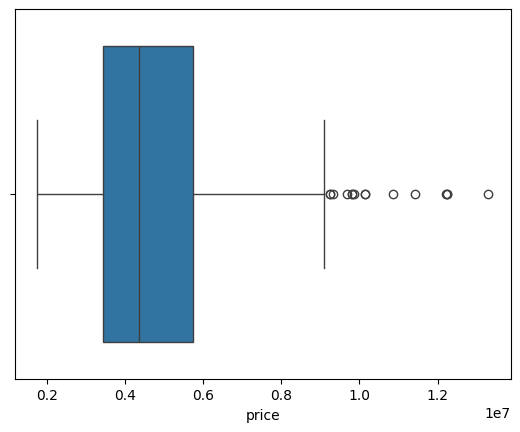

In [291]:
sns.boxplot(x=df['price'])
plt.show()

In [292]:
df.shape

(545, 15)

In [293]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]
print("outliers(price) :")
for out in outliers['price']:
    print(out)
    
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

outliers(price) :
13300000
12250000
12250000
12215000
11410000
10850000
10150000
10150000
9870000
9800000
9800000
9681000
9310000
9240000
9240000


In [294]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = df[(df['area'] < Q1 - 1.5*IQR) | (df['area'] > Q3 + 1.5*IQR)]
print("outliers(area) :")
for out in outliers['area']:
    print(out)
    
df = df[(df['area'] >= Q1 - 1.5*IQR) & (df['area'] <= Q3 + 1.5*IQR)]

outliers(area) :
11440
11175
13200
12090
10500
15600
11460
10500
10500
11410
10700
12900
12944


In [295]:
df.shape

(517, 15)

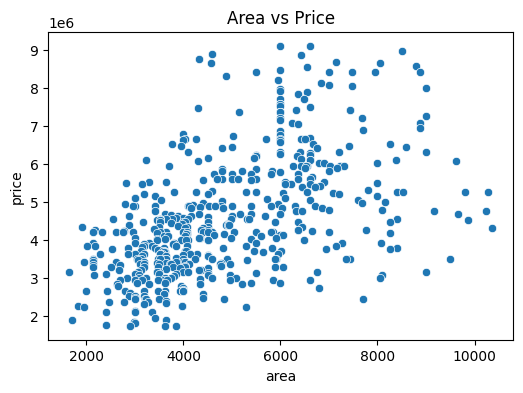

In [296]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=df['area'], y="price")
plt.title(f"Area vs Price")
plt.show() 

In [297]:
df['bedrooms/area'] = df['bedrooms'] / (df['area'] + 1e-6)
df['bathrooms/area'] = df['bathrooms'] / (df['area'] + 1e-6)
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom_encoded']


In [298]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
print(len(X_train))
print(len(X_test))

s_features = ['area','bedrooms','bathrooms','stories','parking','bedrooms/area','bathrooms/area','total_rooms']

ss = StandardScaler()
X_train[s_features] = ss.fit_transform(X_train[s_features])
X_test[s_features] = ss.transform(X_test[s_features])


310
207


In [299]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

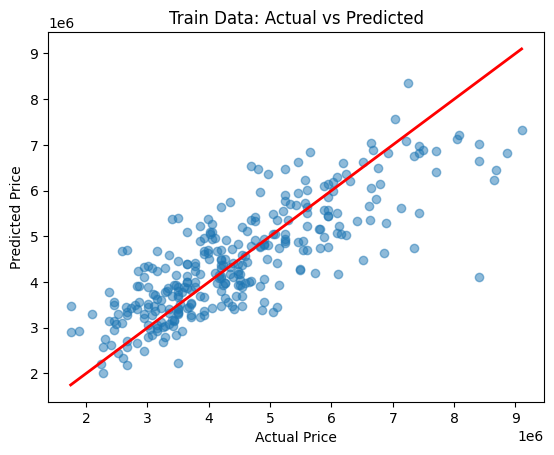

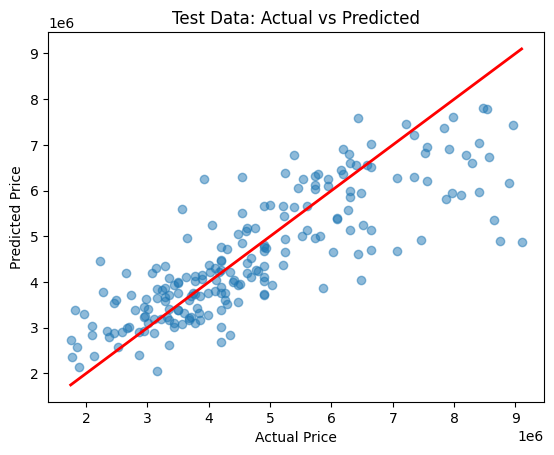

In [300]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Train Data: Actual vs Predicted")
plt.show()

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test Data: Actual vs Predicted")
plt.show()

In [301]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R²:", model.score(X_test, y_test))

RMSE: 1018363841208.2169
MAE: 738652.7164117281
Test R²: 0.6690754787767352
